# Números para leer mejor
## Nube de palabras Borges
### Por: Angela Cristina Villate

![Borges](nubeBorges.png)

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
nltk.download( 'punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def preprocess_text(text, words_to_remove=None):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar emojis
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F'
                  r'\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F'
                  r'\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', ' ', text)

    # Eliminar caracteres no alfabéticos y números
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenización
    words = nltk.word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'english' por tu idioma
    words = [word for word in words if word not in stop_words]

    # Eliminar palabras personalizadas
    if words_to_remove:
        words = [word for word in words if word not in words_to_remove]

    # Unir palabras preprocesadas
    preprocessed_text = ' '.join(words)

    return preprocessed_text

In [4]:
## leer el archivo de texto
with open('borges.txt', 'r', encoding='utf-8') as file:
    raw_text = file.read()

In [47]:
#Lista de palabras a eliminar 
words_to_remove = ['hashtag', 's',, 'm', 'h','culo', 'culos','b', 'vi','la', 'lo', 'le', 'que','en', 'se', 'de', 'el', 'los', 'las', 'un', 'con', 'en', 'n', 'una', 'su', 'son', 'por', 'para', 'del', 'nos', 'sobre', 'e', 'https', 'lnkd', 'este','esto', 'es', 'ni', 'sus', 'todo', 'sin', 'como']
## preprocesamiento
# Realiza el preprocesamiento con eliminación de palabras
processed_text = preprocess_text(raw_text, words_to_remove)
# Verifica el texto después del preprocesamiento
print("\nTexto después del preprocesamiento:")
print(processed_text)

SyntaxError: invalid syntax (2111743855.py, line 2)

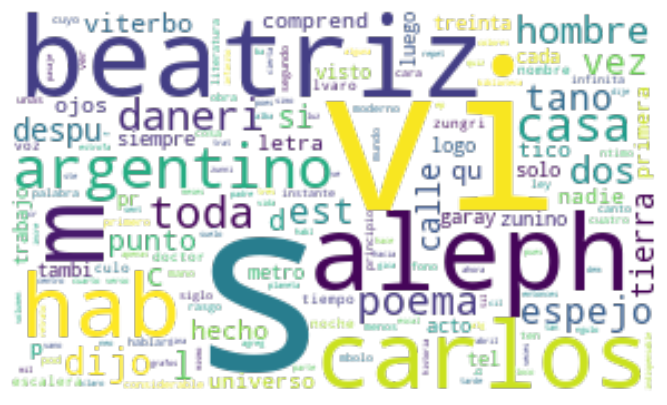

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Tu texto preprocesado
preprocessed_text = processed_text

# Cargar la imagen que se usará como máscara
mask_image = np.array(Image.open('borges3.jpg'))  # Cambia 'tu_imagen.png' con la ruta de tu imagen

# Configurar el objeto WordCloud con la máscara y colores originales
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color=None, mode='RGBA',
                      colormap='viridis', collocations=False, mask=mask_image).generate(preprocessed_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

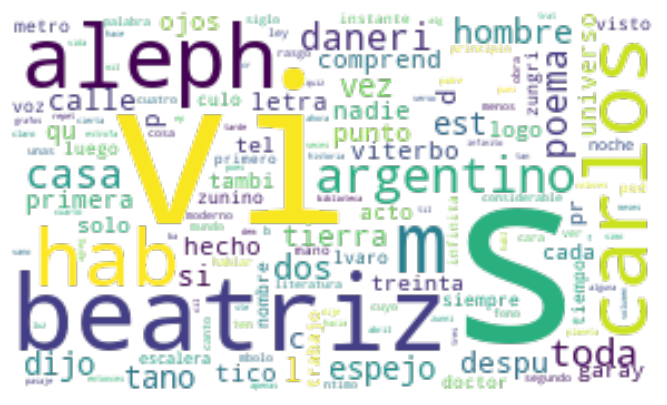

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Tu texto preprocesado
preprocessed_text = preprocessed_text

# Cargar la imagen que se usará como máscara y convertirla a escala de grises
mask_image = np.array(Image.open('borges3.jpg').convert('L'))  # Cambia 'tu_imagen.png' con la ruta de tu imagen

# Configurar el objeto WordCloud con la máscara y colores originales
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color=None, mode='RGBA',
                      colormap='viridis', collocations=False, mask=mask_image).generate(preprocessed_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

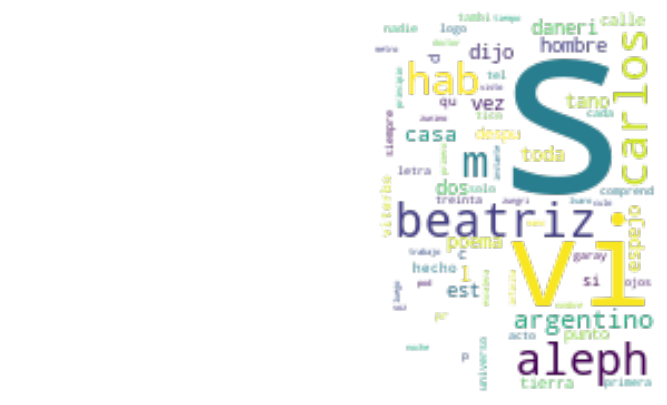

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def generate_wordcloud_outside(image_path, text, save_path='wordcloud_outside.png'):
    # Cargar la imagen que se usará como máscara y convertirla a escala de grises
    mask_image = np.array(Image.open(image_path).convert('L'))

    # Invertir los colores en la máscara (negro a blanco y viceversa)
    mask_image = np.invert(mask_image)

    # Configurar el objeto WordCloud con la máscara invertida
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color=None, mode='RGBA',
                          colormap='viridis', collocations=False, mask=mask_image).generate(text)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

    # Guardar la nube de palabras
    wordcloud.to_file(save_path)

# Especifica la ruta de la imagen que se usará como máscara y el texto para la nube de palabras
image_path = 'borges3.jpg'  # Cambia 'tu_silueta.png' con la ruta de tu imagen de silueta
texto_nube = processed_text   # Cambia 'tu_texto_aqui' con el texto que desees

# Llama a la función para generar y mostrar la nube de palabras fuera de la silueta
generate_wordcloud_outside(image_path, texto_nube)

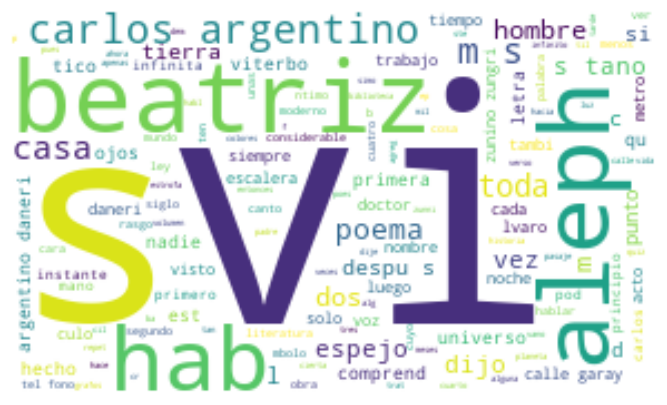

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Lee el texto que quieres incluir en la nube de palabras
texto = processed_text

# Carga la máscara en blanco y negro
mascara = np.array(Image.open("borges3.jpg"))

# Crea la nube de palabras con la máscara
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mascara).generate(texto)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

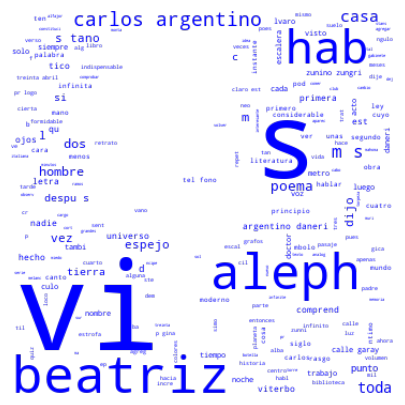

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Lee el texto que quieres incluir en la nube de palabras
texto = processed_text

# Carga la máscara en blanco y negro
mascara = np.array(Image.open("borges4.png"))

# Ajustes de la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color=None, mode='RGBA', mask=mascara, color_func=lambda *args, **kwargs: "blue").generate(texto)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

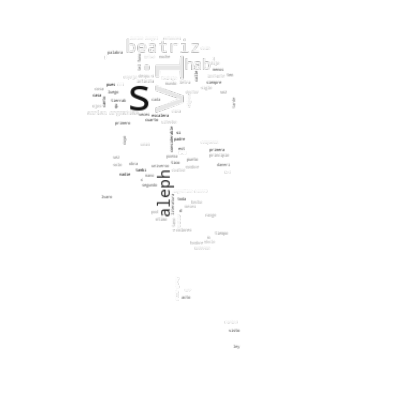

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Lee el texto que quieres incluir en la nube de palabras
texto = processed_text

# Carga la máscara en blanco y negro
mascara = np.array(Image.open("borges4.png"))

# Invertir los colores de la máscara para que las palabras aparezcan en la parte blanca
mascara = np.invert(mascara)

# Ajustes de la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color=None, mode='RGBA', mask=mascara, colormap='gray').generate(texto)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
!pip install scikit-image

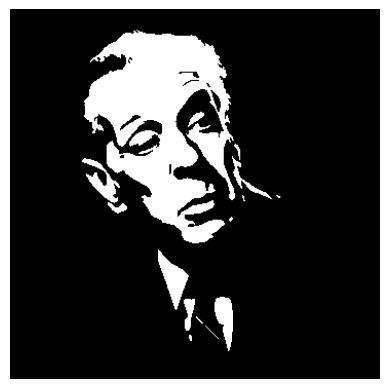

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import color, filters

# Lee el texto que quieres incluir en la nube de palabras
texto = processed_text

# Carga la imagen original en blanco y negro
imagen_original = np.array(Image.open("borges4.png"))

# Convierte la imagen original a escala de grises si tiene tres canales
if imagen_original.shape[-1] == 3:
    imagen_gris = color.rgb2gray(imagen_original)
else:
    imagen_gris = imagen_original

# Aplica un umbral para obtener una imagen binaria (silueta)
umbral = filters.threshold_otsu(imagen_gris)
silueta = (imagen_gris > umbral).astype(float)

# Crea la nube de palabras en una imagen en blanco
wordcloud = WordCloud(width=800, height=400, background_color='white', mode='RGBA', colormap='gray').generate(texto)

# Obtén la máscara de la nube de palabras con el mismo tamaño que la imagen original
wordcloud_mask = np.array(wordcloud.to_image().resize((imagen_original.shape[1], imagen_original.shape[0])))

# Combina la silueta y la máscara de la nube de palabras usando np.dstack
imagen_resultado = np.dstack([silueta, silueta, silueta, (1 - wordcloud_mask[:, :, 3:] / 255.0) + wordcloud_mask[:, :, 3:] / 255.0])

# Muestra la imagen resultante
plt.imshow(imagen_resultado, interpolation='bilinear')
plt.axis('off')
plt.show()

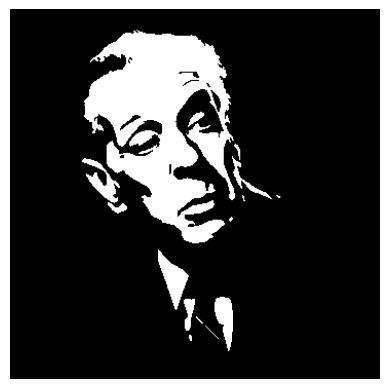

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import color, filters

# Lee el texto que quieres incluir en la nube de palabras
texto = processed_text

# Carga la imagen original en blanco y negro
imagen_original = np.array(Image.open("borges4.png"))

# Convierte la imagen original a escala de grises si tiene tres canales
if imagen_original.shape[-1] == 3:
    imagen_gris = color.rgb2gray(imagen_original)
else:
    imagen_gris = imagen_original

# Aplica un umbral para obtener una imagen binaria (silueta)
umbral = filters.threshold_otsu(imagen_gris)
silueta = (imagen_gris > umbral).astype(float)

# Crea la nube de palabras en una imagen en blanco con fondo transparente
wordcloud = WordCloud(width=800, height=400, background_color=None, mode='RGBA', colormap='gray', color_func=lambda *args, **kwargs: (255, 255, 255)).generate(texto)

# Obtén la máscara de la nube de palabras con el mismo tamaño que la imagen original
wordcloud_mask = np.array(wordcloud.to_image().resize((imagen_original.shape[1], imagen_original.shape[0])))

# Combina la silueta y la máscara de la nube de palabras usando np.dstack
imagen_resultado = np.dstack([silueta, silueta, silueta, (1 - wordcloud_mask[:, :, 3:] / 255.0) + wordcloud_mask[:, :, 3:] / 255.0])

# Muestra la imagen resultante
plt.imshow(imagen_resultado, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import color, filters

# Lee el texto que quieres incluir en la nube de palabras
texto = processed_text

# Carga la imagen original en blanco y negro
imagen_original = np.array(Image.open("borges4.png"))

# Convierte la imagen original a escala de grises si tiene tres canales
if imagen_original.shape[-1] == 3:
    imagen_gris = color.rgb2gray(imagen_original)
else:
    imagen_gris = imagen_original

# Aplica un umbral para obtener una imagen binaria (silueta)
umbral = filters.threshold_otsu(imagen_gris)
silueta = (imagen_gris > umbral).astype(float)

# Crea la nube de palabras en una imagen en blanco con fondo transparente
wordcloud = WordCloud(width=800, height=400, background_color=None, mode='RGBA', colormap='gray', color_func=lambda *args, **kwargs: (255, 255, 255)).generate(texto)

# Obtén la máscara de la nube de palabras con el mismo tamaño que la imagen original
wordcloud_mask = Image.new("RGBA", (imagen_original.shape[1], imagen_original.shape[0]), (255, 255, 255, 0))
wordcloud_mask.paste(Image.fromarray(np.array(wordcloud)), (0, 0), Image.fromarray(np.array(wordcloud)))

# Combina la silueta y la máscara de la nube de palabras usando Image.alpha_composite
imagen_resultado = Image.alpha_composite(Image.fromarray((silueta * 255).astype(np.uint8), "L"), wordcloud_mask)

# Muestra la imagen resultante
plt.imshow(imagen_resultado, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: image has wrong mode

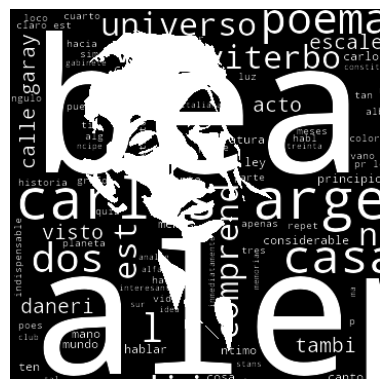

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import color, filters

# Lee el texto que quieres incluir en la nube de palabras
texto = processed_text

# Carga la imagen original en blanco y negro
imagen_original = np.array(Image.open("borges4.png"))

# Convierte la imagen original a escala de grises si tiene tres canales
if imagen_original.shape[-1] == 3:
    imagen_gris = color.rgb2gray(imagen_original)
else:
    imagen_gris = imagen_original

# Aplica un umbral para obtener una imagen binaria (silueta)
umbral = filters.threshold_otsu(imagen_gris)
silueta = (imagen_gris > umbral).astype(np.uint8) * 255

# Crea la nube de palabras en una imagen en blanco con fondo transparente
wordcloud = WordCloud(width=800, height=400, background_color=None, mode='RGBA', colormap='gray', color_func=lambda *args, **kwargs: (255, 255, 255)).generate(texto)

# Obtén la máscara de la nube de palabras con el mismo tamaño que la imagen original
wordcloud_mask = Image.new("RGBA", (imagen_original.shape[1], imagen_original.shape[0]), (255, 255, 255, 0))
wordcloud_mask.paste(Image.fromarray(np.array(wordcloud)), (0, 0), Image.fromarray(np.array(wordcloud)))

# Ajusta el modo de la silueta
silueta_imagen = Image.fromarray(silueta, mode='L')

# Combina la silueta y la máscara de la nube de palabras usando Image.alpha_composite
imagen_resultado = Image.alpha_composite(silueta_imagen.convert('RGBA'), wordcloud_mask)

# Muestra la imagen resultante
plt.imshow(imagen_resultado, interpolation='bilinear')
plt.axis('off')
plt.show()

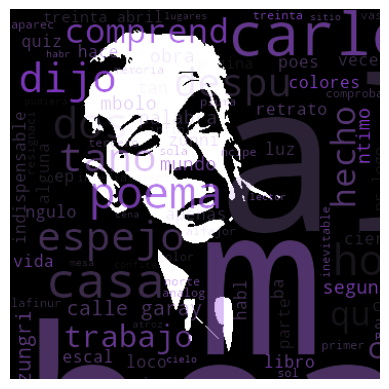

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import color, filters

# Lee el texto que quieres incluir en la nube de palabras
texto = processed_text

# Carga la imagen original en blanco y negro
imagen_original = np.array(Image.open("borges4.png"))

# Convierte la imagen original a escala de grises si tiene tres canales
if imagen_original.shape[-1] == 3:
    imagen_gris = color.rgb2gray(imagen_original)
else:
    imagen_gris = imagen_original

# Aplica un umbral para obtener una imagen binaria (silueta)
umbral = filters.threshold_otsu(imagen_gris)
silueta = (imagen_gris > umbral).astype(np.uint8) * 255

# Crea la nube de palabras en una imagen en blanco con fondo transparente
wordcloud = WordCloud(
    width=1000, 
    height=500, 
    background_color=None, 
    mode='RGBA', 
    colormap='viridis',  # Cambia el colormap a 'viridis' para obtener violeta y azul
    color_func=lambda *args, **kwargs: (138, 43, 226, int(np.random.uniform(80, 255))),  # Color violeta-azul con transparencia aleatoria
    max_words=280  # Aumenta el número máximo de palabras
).generate(texto)

# Obtén la máscara de la nube de palabras con el mismo tamaño que la imagen original
wordcloud_mask = Image.new("RGBA", (imagen_original.shape[1], imagen_original.shape[0]), (255, 255, 255, 0))
wordcloud_mask.paste(Image.fromarray(np.array(wordcloud)), (0, 0), Image.fromarray(np.array(wordcloud)))

# Ajusta el modo de la silueta
silueta_imagen = Image.fromarray(silueta, mode='L')

# Combina la silueta y la máscara de la nube de palabras usando Image.alpha_composite
imagen_resultado = Image.alpha_composite(silueta_imagen.convert('RGBA'), wordcloud_mask)

# Muestra la imagen resultante
plt.imshow(imagen_resultado, interpolation='bilinear')
plt.axis('off')
plt.show()

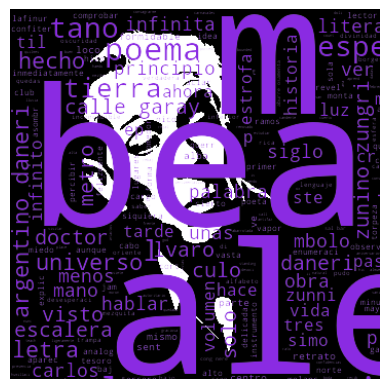

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import color, filters

# Lee el texto que quieres incluir en la nube de palabras
texto = processed_text

# Carga la imagen original en blanco y negro
imagen_original = np.array(Image.open("borges4.png"))

# Convierte la imagen original a escala de grises si tiene tres canales
if imagen_original.shape[-1] == 3:
    imagen_gris = color.rgb2gray(imagen_original)
else:
    imagen_gris = imagen_original

# Aplica un umbral para obtener una imagen binaria (silueta)
umbral = filters.threshold_otsu(imagen_gris)
silueta = (imagen_gris > umbral).astype(np.uint8) * 255

# Crea la nube de palabras en una imagen en blanco con fondo transparente
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color=None, 
    mode='RGBA', 
    colormap='viridis',  # Cambia el colormap a 'viridis' para obtener violeta y azul
    color_func=lambda *args, **kwargs: (138, 43, 226, 255),  # Color violeta sin transparencia
    max_words=500  # Aumenta el número máximo de palabras
).generate(texto)

# Obtén la máscara de la nube de palabras con el mismo tamaño que la imagen original
wordcloud_mask = Image.new("RGBA", (imagen_original.shape[1], imagen_original.shape[0]), (255, 255, 255, 0))
wordcloud_mask.paste(Image.fromarray(np.array(wordcloud)), (0, 0), Image.fromarray(np.array(wordcloud)))

# Ajusta el modo de la silueta
silueta_imagen = Image.fromarray(silueta, mode='L')

# Combina la silueta y la máscara de la nube de palabras usando Image.alpha_composite
imagen_resultado = Image.alpha_composite(silueta_imagen.convert('RGBA'), wordcloud_mask)

# Muestra la imagen resultante
plt.imshow(imagen_resultado, interpolation='bilinear')
plt.axis('off')
plt.show()